In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


import sys 
import os
path = os.path.dirname(os.getcwd())
sys.path.append(path)
from lib import *

In [4]:
# Results Import
optimization_result = pd.read_csv("../results/1_optimization_result.csv")
baseline_result = pd.read_csv("../results/2_baseline.csv")
simpleCA_result = pd.read_csv("../results/3_simpleCA_result.csv")

randomEB_result = pd.read_csv("../results/4_randomEB_optimization.csv")
leftover_result = pd.read_csv("../results/5_leftover_optimization_result.csv")
leftover_resultWeighted = pd.read_csv("../results/7_leftoverWeighted_optimization_result.csv")

#op_baseline_result = pd.read_csv("../results/8_baselineOptimization_result.csv")


# Data Import
df = pd.read_csv(r'../data/DE_2021.csv')
ci_data_2021_hourly = df['carbon_intensity_avg']
df = pd.read_csv(r'../data/projectcount_wikiDE_2015.csv')
clickData_hourly_2015 = df["De"].tolist()
clickData_hourly_2015 = clickData_hourly_2015[24:] + clickData_hourly_2015[0:24]

# Revenue

Text(0, 0.5, 'User throughput (in millions)')

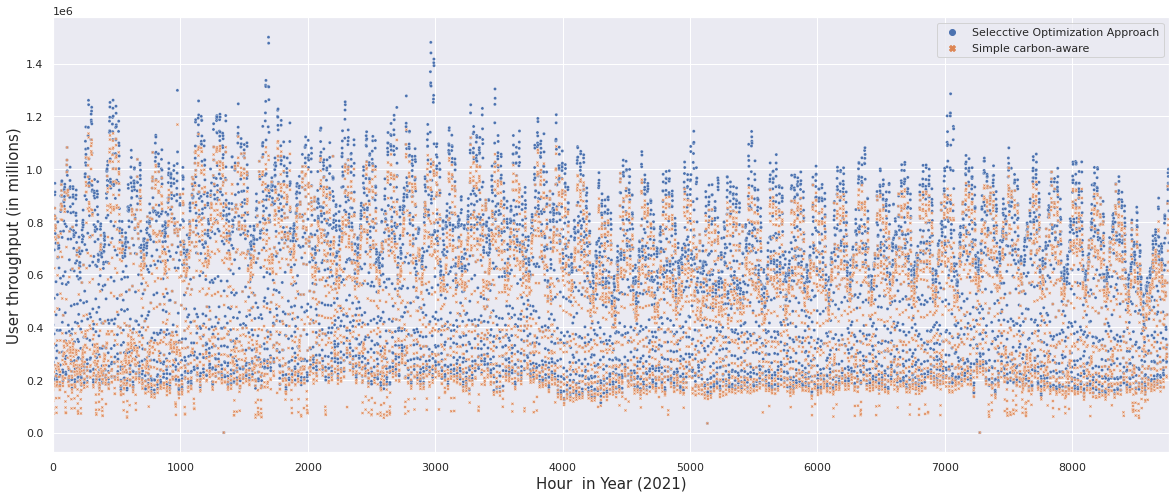

In [5]:
# Seaborn Figure size
sns.set(rc={'figure.figsize':(20,8)})


opti = np.array(optimization_result["user-throughput"])
#ed_hourly_highPower[1000] = 6277312.0
#ed_hourly_highPower[1001] = 6277312.0
simple = np.array(simpleCA_result["user-throughput"])
#op = np.array(op_baseline_result["q"])

data = pd.DataFrame({'Selecctive Optimization Approach': opti, 'Simple carbon-aware': simple}) #, 'Mathematical Optium':op
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
revenue = sns.scatterplot(data=data, s=10)

revenue.set(xlim=(0,8760))
revenue.set_xlabel('Hour  in Year (2021)', fontdict={'size': 15})
revenue.set_ylabel('User throughput (in millions)', fontdict={'size': 15})

#revenue.axes.set_title("Revenue",fontsize=20)

In [11]:
# Save plot to disk
fig = revenue.get_figure()
fig.savefig("../img/comparingQ1.png", bbox_inches = 'tight')

## CDF

/tmp/ipykernel_574565/1792681096.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  revenue_cdf.set_yticklabels(millions, fontdict={'size': 15})


Text(0, 0.5, 'User throughput (in millions)')

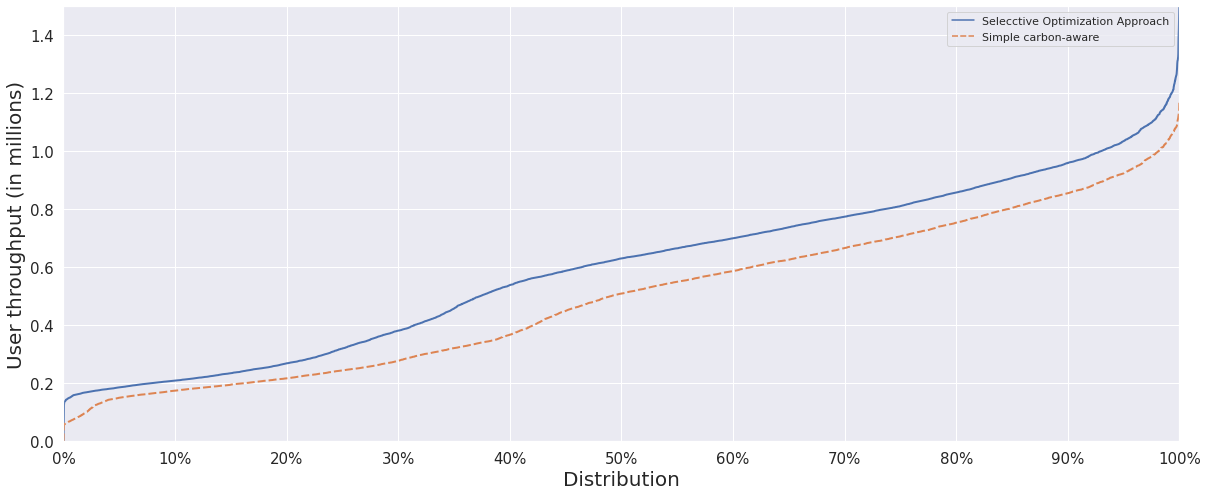

In [6]:
data = pd.DataFrame({'Selecctive Optimization Approach': sorted(opti), 'Simple carbon-aware': sorted(simple)})
#data = pd.DataFrame({'Hourly Optimization Approach': sorted(opti), 'Simple carbon-aware': sorted(simple), 'Mathematical Optium': sorted(op)})
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
revenue_cdf = sns.lineplot(data=data, linewidth=2)

revenue_cdf.set(xlim=(0,8760),ylim=(0,1500100))
xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
revenue_cdf.set_xticks(xlabels)
revenue_cdf.set_xticklabels(percentage, fontdict={'size': 15})

millions = [0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4]
#sorted_EBU.set_yticks(ylabels)
revenue_cdf.set_yticklabels(millions, fontdict={'size': 15})


revenue_cdf.set_xlabel('Distribution', fontdict={'size': 20})
revenue_cdf.set_ylabel('User throughput (in millions)', fontdict={'size': 20})
#revenue_cdf.axes.set_title("Revenue",fontsize=20)

In [7]:
# Save plot to disk
fig = revenue_cdf.get_figure()
fig.savefig("../img/comparingQ_cdf.png", bbox_inches = 'tight')

## Statistics

In [8]:
totalUsersAnnum = sum(clickData_hourly_2015)

mean_distanceQ = 0
highest_gap = 0
smallest_gap = 1
for i in range(8760):
    mean_distanceQ += optimization_result["user-throughput"][i] - simpleCA_result["user-throughput"][i]
    if (optimization_result["user-throughput"][i] - simpleCA_result["user-throughput"][i]) > highest_gap:
        highest_gap = optimization_result["user-throughput"][i] - simpleCA_result["user-throughput"][i]
        if 756756.7721999998 == (optimization_result["user-throughput"][i] - simpleCA_result["user-throughput"][i]):
            print(i)
            print(i/8760)
    if (optimization_result["user-throughput"][i] - simpleCA_result["user-throughput"][i]) < smallest_gap:
        smallest_gap = optimization_result["user-throughput"][i] - simpleCA_result["user-throughput"][i]

print("Mean distance between Selective and Simple: " + str(round(mean_distanceQ/totalUsersAnnum *100,2)))
print("Highest gap in a single hour is " + str(round(highest_gap *100,2)))
print("Smallest gap in a single hour is " + str(round(smallest_gap *100,2)))

2774
0.31666666666666665
Mean distance between Selective and Simple: 9.73
Highest gap in a single hour is 75675677.22
Smallest gap in a single hour is -0.0


# in q %

Text(0, 0.5, 'User throughput (in millions)')

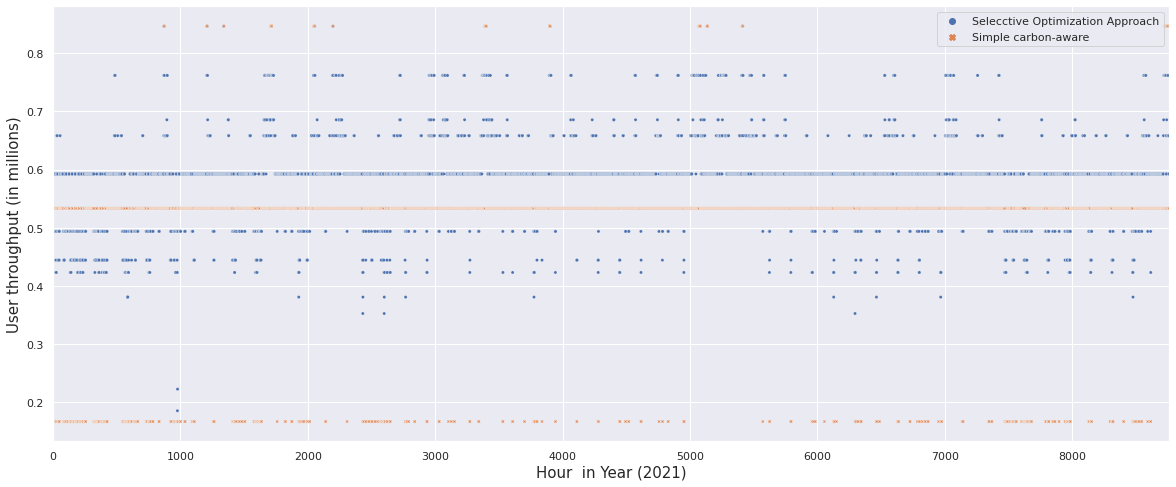

In [9]:
# Seaborn Figure size
sns.set(rc={'figure.figsize':(20,8)})


opti = np.array(optimization_result["q"])
#ed_hourly_highPower[1000] = 6277312.0
#ed_hourly_highPower[1001] = 6277312.0
simple = np.array(simpleCA_result["q"])
#op = np.array(op_baseline_result["q"])

data = pd.DataFrame({'Selecctive Optimization Approach': opti, 'Simple carbon-aware': simple})#, 'Mathematical Optium':op
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
revenue = sns.scatterplot(data=data, s=10)

revenue.set(xlim=(0,8760))
revenue.set_xlabel('Hour  in Year (2021)', fontdict={'size': 15})
revenue.set_ylabel('User throughput (in millions)', fontdict={'size': 15})

#revenue.axes.set_title("Revenue",fontsize=20)

/tmp/ipykernel_574565/249292929.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  revenue_cdf2.set_yticklabels(millions, fontdict={'size': 15})


Text(0, 0.5, 'q')

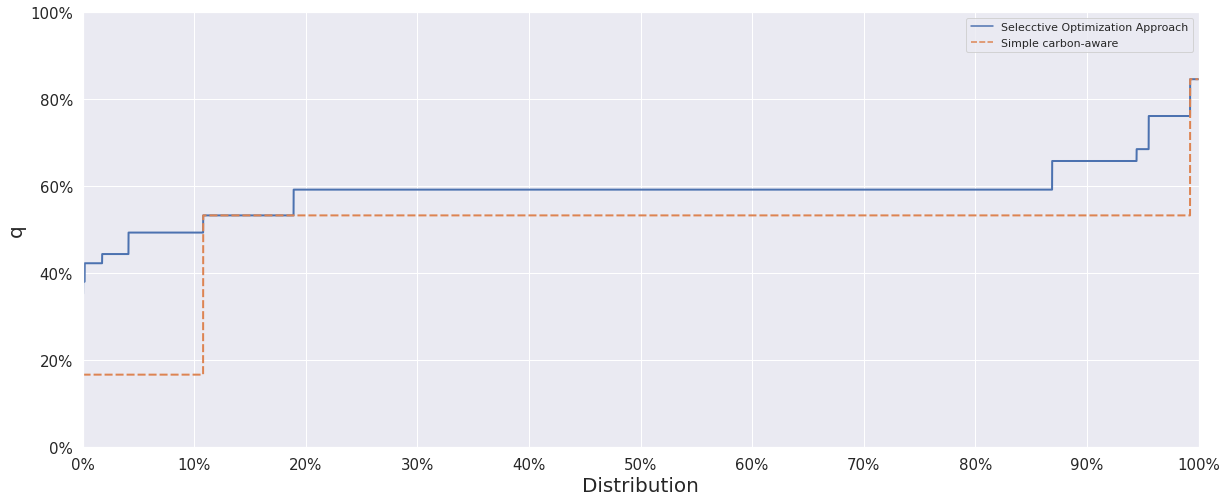

In [10]:
data = pd.DataFrame({'Selecctive Optimization Approach': sorted(opti), 'Simple carbon-aware': sorted(simple)})
#data = pd.DataFrame({'Hourly Optimization Approach': sorted(opti), 'Simple carbon-aware': sorted(simple), 'Mathematical Optium': sorted(op)})
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
revenue_cdf2 = sns.lineplot(data=data, linewidth=2)

revenue_cdf2.set(xlim=(0,8760),ylim=(0,1))
xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
revenue_cdf2.set_xticks(xlabels)
revenue_cdf2.set_xticklabels(percentage, fontdict={'size': 15})

millions = [format(x) + '%' for x in [0,20,40,60,80,100]]
#sorted_EBU.set_yticks(ylabels)
revenue_cdf2.set_yticklabels(millions, fontdict={'size': 15})


revenue_cdf2.set_xlabel('Distribution', fontdict={'size': 20})
revenue_cdf2.set_ylabel('q', fontdict={'size': 20})
#revenue_cdf.axes.set_title("Revenue",fontsize=20)

In [17]:
# Save plot to disk
fig = revenue_cdf2.get_figure()
fig.savefig("../img/comparingQ2_cdf.png", bbox_inches = 'tight')

# Other approaches CDF

Text(0, 0.5, 'User throughput (in millions)')

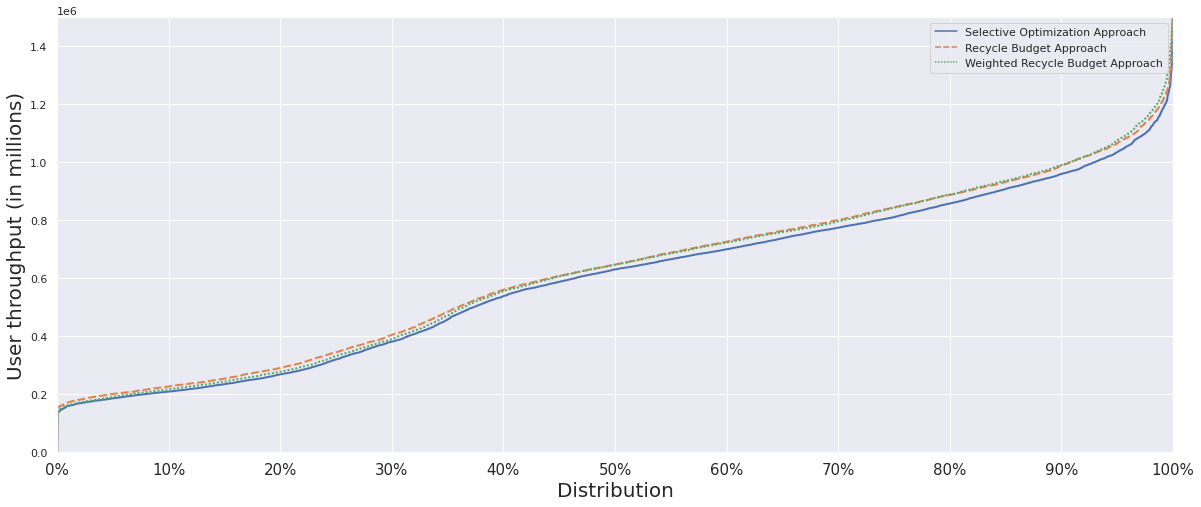

In [11]:
opti = np.array(optimization_result["user-throughput"])
c = np.array(leftover_result["user-throughput"])
d = np.array(leftover_resultWeighted["user-throughput"])
#e = np.array(randomEB_result["q"])


data = pd.DataFrame({'Selective Optimization Approach': sorted(opti), 'Recycle Budget Approach': sorted(c), 'Weighted Recycle Budget Approach': sorted(d)})
#data = pd.DataFrame({'Hourly Optimization Approach': sorted(opti), 'Simple carbon-aware': sorted(simple), 'Mathematical Optium': sorted(op)})
#data = pd.DataFrame({'q': opti, 'q_simple': simple})
revenue_cdf = sns.lineplot(data=data, linewidth=2)

revenue_cdf.set(xlim=(0,8760),ylim=(0,1500100))
xlabels = [math.ceil(x*876) for x in range(0,11)]
percentage = [format(x*10) + '%' for x in range(0,11)]
revenue_cdf.set_xticks(xlabels)
revenue_cdf.set_xticklabels(percentage, fontdict={'size': 15})

#millions = [format(x) for x in range(0,6)]
#sorted_EBU.set_yticks(ylabels)
#revenue_cdf.set_yticklabels(millions, fontdict={'size': 15})


revenue_cdf.set_xlabel('Distribution', fontdict={'size': 20})
revenue_cdf.set_ylabel('User throughput (in millions)', fontdict={'size': 20})
#revenue_cdf.axes.set_title("Revenue",fontsize=20)

# Statistics

In [ ]:
temp = 0
temp2 = 0
for i in range(len(opti)):
    if optimization_result["q"][i] < simpleCA_result["q"][i]:
        temp += 1
    else:
        if optimization_result["q"][i] == simpleCA_result["q"][i]:
            temp += 1

print("Number of times simple has same revenue: " + str(temp))
print("Number of times simple has same revenue (in %): " + str(temp / len(opti) * 100))

Number of times simple has same revenue: 843
Number of times simple has same revenue (in %): 9.623287671232877


In [ ]:
# Is the low-power choice picked by the selective optimization?
min_q = min(simpleCA_result["q"])

count = 0
for i in range(len(opti)):
    if optimization_result["q"][i] == min_q:
        count += 1
print("Lowest q for our approach:" + str(min(optimization_result["q"])))
print("Frequency the selective optimisation picks lowest: " + str(count))


Lowest q for our approach:0.1856249999999999
Frequency the selective optimisation picks lowest: 0


In [ ]:
temp = 0
temp2 = 0
for i in range(len(opti)):
    if leftover_resultWeighted["user-throughput"][i] < optimization_result["user-throughput"][i]:
        temp += 1
    else:
        if leftover_resultWeighted["user-throughput"][i] == leftover_result["user-throughput"][i]:
            temp2 += 1

print("Number of times weighted has same revenue: " + str(temp))
print("Number of times weighted has same revenue (in %): " + str(temp / len(opti) * 100))

Number of times weighted has same revenue: 612
Number of times weighted has same revenue (in %): 6.986301369863014


In [ ]:
temp = 0
temp2 = 0
for i in range(len(opti)):
    if simple[i] > 0:
        temp += (opti[i] - simple[i]) / simple[i]
    else:
        print(i)
print("Mean Gap: " + str(temp/len(opti)))
print("Total Gap: " + str(sum(opti)-sum(simple)))
print("Total Gap (in %): " + str(sum(opti)/sum(simple) * 100))

1364
7298
Mean Gap: 0.2505925644061133
Total Gap: 729602706.5603704
Total Gap (in %): 116.43064764587669


In [ ]:
print("Largest revenue optimal: " + str(max(opti)))
print("Largest revenue simple: " + str(max(simple)))

Largest revenue optimal: 1402509.2672249996
Largest revenue simple: 1181340.2313404998
